In [1]:
import numpy as np
import pandas as pd
import cv2
import os

In [2]:
img_label_file = "data/labels.csv"

labels_csv = pd.read_csv(img_label_file, index_col=0)
labels = labels_csv.loc["fall-01"]
label_1 = labels.loc[labels["frame"] == 1]
label_1.label

fall name
fall-01   -1
Name: label, dtype: int64

In [3]:
### Read in the data
img_data_dir = "data/imgs/" # replace with your own dir if necessary
img_label_file = "data/labels.csv"

## Given an image name, extracts the label from the labels.csv file. True if 1 False if -1
def extract_label(file_name):
    split = file_name.split("-") # split image name
    fall_name = split[0] + "-" + split[1] # reconstruct fall name
    frame = int(split[-1].split(".")[0]) # end of split is like 113.png. removes .png part
    fall_labels = labels_csv.loc[fall_name]
    frame_label = fall_labels.loc[fall_labels["frame"] == frame]
    return int(frame_label.label) > 0

### Loads in the data from images and stores it in an array. Order is important because 
### The labels are in the same order as the images are appended to the array
def load_img_data():
    imgs = []
    labels = []
    labels_csv = pd.read_csv(img_label_file)
    
    # Iterates through fall folders and the frames within each fall
    for img_folder in os.listdir(img_data_dir):
        path = os.path.join(img_data_dir,img_folder)
        if ("fall" in path):
            for file in os.listdir(path):
                img = cv2.imread(os.path.join(path, file))
                img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                imgs.append(img)
                labels.append([extract_label(file)])
                
    return imgs, labels

In [4]:
images, labels = load_img_data()

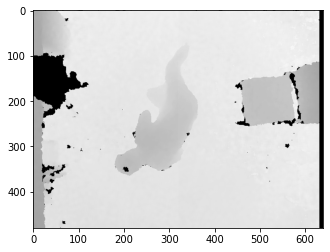

In [6]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [5]:
from sklearn.model_selection import train_test_split
images = np.asarray(images)
labels = np.asarray(labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33)


In [6]:
# starter model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(480, 640, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
          


Using TensorFlow backend.


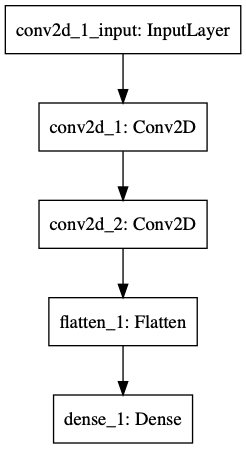

In [10]:
from keras.utils import plot_model

plot_model(model, to_file='model.png')

In [7]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
#train the model
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
2633/2633 [==============================] - 758s 288ms/step - loss: 9.1532 - accuracy: 0.6772
Epoch 2/3
2633/2633 [==============================] - 800s 304ms/step - loss: 0.5387 - accuracy: 0.7243
Epoch 3/3
2633/2633 [==============================] - 740s 281ms/step - loss: 0.2370 - accuracy: 0.9107


In [9]:
model.evaluate(X_test, y_test)

1298/1298 [==============================] - 62s 48ms/step


[0.24707573597163007, 0.8906009197235107]

In [10]:
y_pred = model.predict(X_test)


In [15]:
print(y_pred, y_test)
print(y_pred > 0.5)

[[0.03146896]
 [0.01848221]
 [0.00094312]
 ...
 [0.01148295]
 [0.27451217]
 [0.00350929]] [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


array([ True])

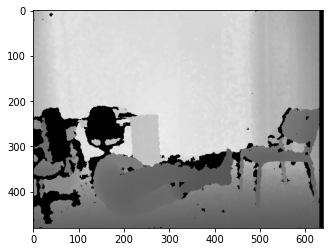

In [23]:
import matplotlib.pyplot as plt

plt.imshow(X_test[15])
y_test[15]

In [16]:
# false - not a fall , True - a fall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred > 0.5))

              precision    recall  f1-score   support

       False       0.87      0.99      0.92       867
        True       0.96      0.70      0.81       431

    accuracy                           0.89      1298
   macro avg       0.91      0.84      0.87      1298
weighted avg       0.90      0.89      0.89      1298



In [38]:
y_test_matrix = []
for i in y_test:
    y_test_matrix.append(i[0])
    
y_pred_matrix = []
y_pred_bool = y_pred > 0.5
for i in y_pred_bool:
    y_pred_matrix.append(i[0])
print(y_test_matrix, y_pred_matrix)

[False, False, False, False, True, False, True, False, False, True, False, False, False, True, True, True, True, True, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, True, True, True, False, True, True, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, True, False, True, False, False, False, False, True, False, False, True, False, False, True, False, True, False, False, False, True, True, True, True, False, False, False, False, True, False, False, False, True, True, True, True, False, False, False, False, True, False, True, False, True, True, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, True, False, True, False, True, Fa

In [27]:
import seaborn as sn
data = {'y_Actual':    1*y_test,
        'y_Predicted': 1*(y_pred > 0.5)
        }
print(data)
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,xticklabels=['Fall', 'Not Fall'], yticklabels=[ 'Fall', 'Not Fall'],fmt='g', annot=True)
plt.show()

{'y_Actual': array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]]), 'y_Predicted': array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])}


ValueError: If using all scalar values, you must pass an index

In [ ]:
# starter model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(480, 640, 3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))

model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))

model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(3, activation='softmax'))
          